In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import dtale
import re

In [2]:
google = pd.read_csv(r'C:\Users\affan.yaqoob\Downloads\googleplaystore.csv')

In [3]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
google.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [6]:
google[google.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,26-Feb-18,Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,31-Jul-18,Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,24-Jul-18,2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,16-Jul-18,4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,6-Apr-18,Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,6-Aug-18,Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,27-Jun-18,Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,1-Jun-18,0.6.88,5.0 and up


In [7]:
google.drop_duplicates(inplace=True)

In [8]:
google.duplicated().sum()

0

<Axes: >

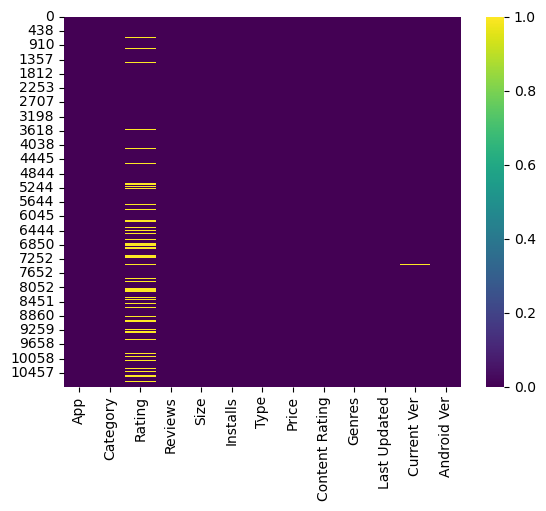

In [9]:
sns.heatmap(google.isnull(),cmap='viridis')

In [10]:
google.dropna(inplace=True)

<Axes: >

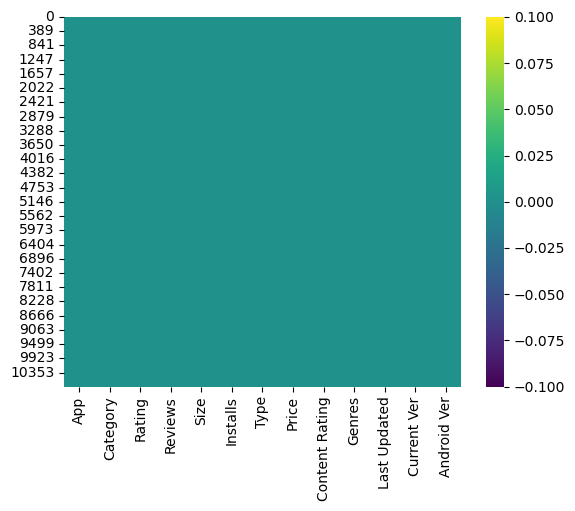

In [11]:
sns.heatmap(google.isnull(),cmap='viridis')

In [12]:
google[google['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,14-Jul-18,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,30-Jul-18,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,30-Jul-18,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,25-May-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,24-Jul-18,Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,27-Sep-17,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,23-May-18,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,23-Mar-18,Varies with device,Varies with device


In [13]:
google[google['Size'].str.contains('[a-zA-Z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [14]:
google['Size'] = google['Size'].str.replace('M','').str.replace('k','')


In [15]:
google[google['Size'].str.contains('[a-zA-Z]')]['Size'].value_counts()

Varies with device    1468
Name: Size, dtype: int64

In [16]:
# Applied category mean on the app sizes that varies with devices.

def extract_numeric_size(size_string):
    size_match = re.search(r'(\d+\.*\d*)', size_string)
    if size_match:
        return float(size_match.group(1))
    else:
        return None

google['Numeric_Size'] = google['Size'].apply(extract_numeric_size)

category_mean_sizes = google.groupby('Category')['Numeric_Size'].mean()

google['Size'] = google.apply(
    lambda row: category_mean_sizes[row['Category']] if row['Size'] == 'Varies with device' else row['Size'],
    axis=1
)

google = google.drop(columns='Numeric_Size')


In [17]:

google['Installs'] = google['Installs'].str.replace('+','').str.replace(",",'').astype(int)

google['Reviews'] = google['Reviews'].astype(int)


google['Size'] = google['Size'].astype('float')

C:\Users\affan.yaqoob\AppData\Local\Temp\ipykernel_2864\2442201662.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [18]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int32  
 4   Size            8886 non-null   float64
 5   Installs        8886 non-null   int32  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 902.5+ KB


Text(0.5, 1.0, 'Distribution of App Categories')

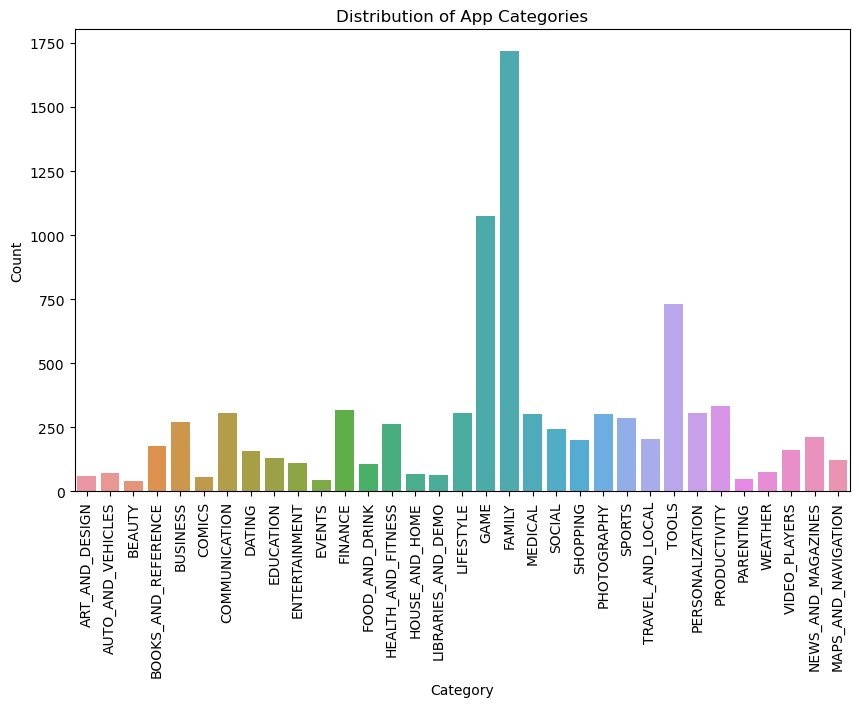

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=google, x = 'Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of App Categories')


# Checking which category is the best for investment if we want to create a paid app 

In [20]:


category_ratings = google.groupby('Category')['Rating'].mean().reset_index()
type_list = ['All'] + sorted(google['Type'].dropna().unique().tolist())


def create_bar_plot(filter_type):
    if filter_type == 'All':
        filtered_data = category_ratings
        title = 'Average Rating by Category for All Types'
        
    else:
        filtered_data = google[google['Type'] == filter_type].groupby('Category')['Rating'].mean().reset_index()
        title = f'Average Rating by Category for Type: {filter_type}'
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_data, x='Category', y='Rating')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Average Rating')
    plt.title(title)
    plt.show()

interact(create_bar_plot, filter_type=widgets.Dropdown(options=type_list, description='Type:'))


interactive(children=(Dropdown(description='Type:', options=('All', 'Free', 'Paid'), value='All'), Output()), …

<function __main__.create_bar_plot(filter_type)>

## People dont like to pay for in Parenting apps alongwith Dating apps and Social apps

In [21]:
category_ratings = google.groupby('Category')['Installs'].sum().reset_index()
type_list = ['All'] + sorted(google['Type'].dropna().unique().tolist())


def create_bar_plot(filter_type):
    if filter_type == 'All':
        filtered_data = category_ratings
        title = 'Total Installs by Category for All Types'
        
    else:
        filtered_data = google[google['Type'] == filter_type].groupby('Category')['Installs'].sum().reset_index()
        title = f'Total Installs by Category for Type: {filter_type}'
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_data, x='Category', y='Installs')
    plt.xticks(rotation=90)
    plt.xlabel('Category')
    plt.ylabel('Installs')
    plt.title(title)
    plt.show()

interact(create_bar_plot, filter_type=widgets.Dropdown(options=type_list, description='Type:'))

interactive(children=(Dropdown(description='Type:', options=('All', 'Free', 'Paid'), value='All'), Output()), …

<function __main__.create_bar_plot(filter_type)>

## The top most category with paid apps is Family . Hence, deploying app in Family category is the primary option with secondary being game.

In [22]:
from scipy.stats import ttest_ind

# Splitting the dataset into free and paid apps
free_apps = google[google['Type'] == 'Free']
paid_apps = google[google['Type'] == 'Paid']

In [23]:
t_stat,p_value = ttest_ind(free_apps['Rating'],paid_apps['Rating'])

In [24]:
if p_value < 0.05:
    print("Reject null hypothesis : There is a significant difference in ratings based upon free or priced")
else :
    print("Accept null hypothesis : There is no significant difference in ratings based upon free or priced")

Reject null hypothesis : There is a significant difference in ratings based upon free or priced


In [25]:
p_value

0.0002984015230732988

C:\Users\affan.yaqoob\AppData\Local\Temp\ipykernel_2864\1894660525.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

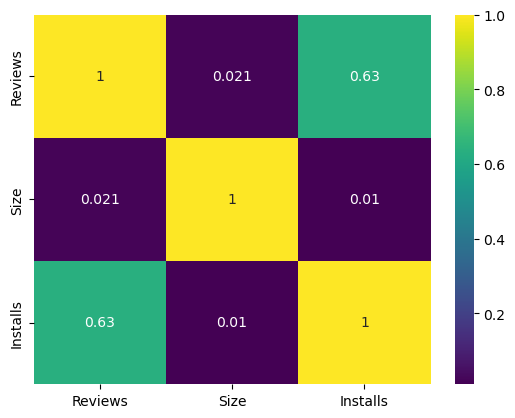

In [26]:
sns.heatmap(google.drop('Rating',axis=1).corr(),cmap='viridis',annot=True)

In [27]:
categories = google['Category'].unique()

def display_heatmap(selected_category):
    subset = google[google['Category'] == selected_category]
    plt.figure(figsize=(10, 6))
    sns.heatmap(subset.drop('Rating',axis=1).corr(), cmap='viridis', annot=True)
    plt.title(f'Correlation Heatmap for Category: {selected_category}')
    plt.show()
    
interact(display_heatmap, selected_category=widgets.Dropdown(options=categories, description='Category:'))


interactive(children=(Dropdown(description='Category:', options=('ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUT…

<function __main__.display_heatmap(selected_category)>

In [28]:
total_reviews = google.groupby('Category')['Reviews'].sum()
total_installs = google.groupby('Category')['Installs'].sum()

reviews_per_install = total_reviews / total_installs
result_df = pd.DataFrame({'Total Reviews': total_reviews, 'Total Installs': total_installs, 'Reviews per Install': reviews_per_install})


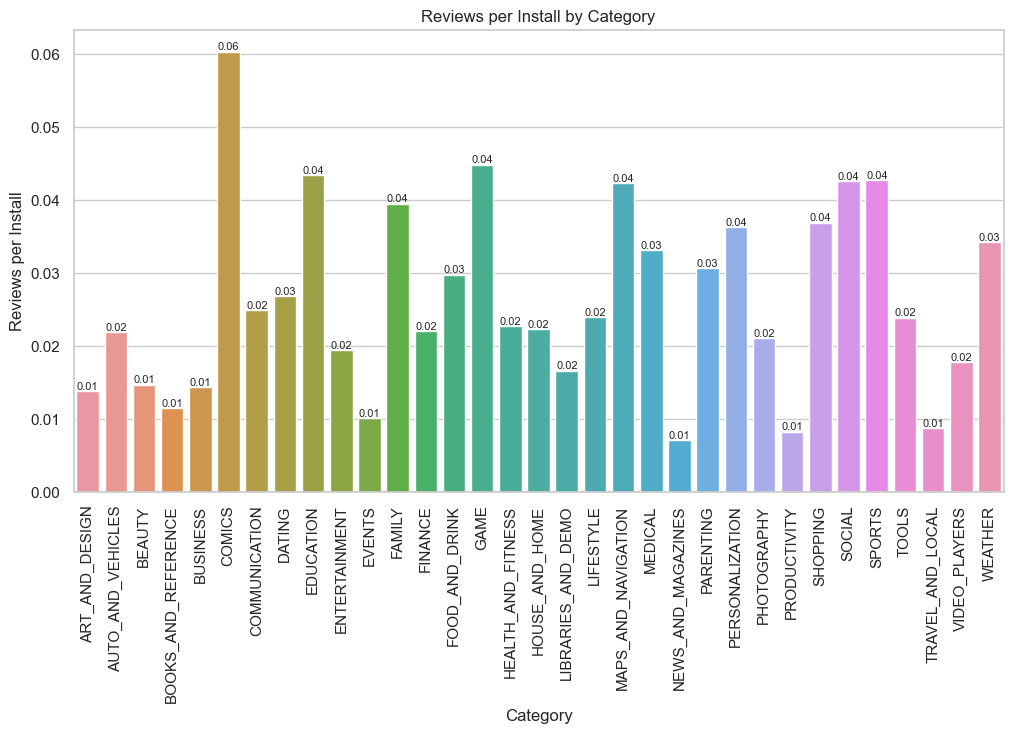

In [29]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=reviews_per_install.index, y=reviews_per_install.values)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Reviews per Install')
plt.title('Reviews per Install by Category')

for i, v in enumerate(reviews_per_install):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

## Mostly people like to give review once they install the app but they dont give much care about giving rating to the app.
## If we go deeper then 0.06% people who install from comic category, give review.